In [17]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


### 1.)Loading the dataset

In [18]:
# Loading the dataset
import pandas as pd
df = pd.read_csv("/Users/hoyinchui/Downloads/Big_Black_Money_Dataset.csv")
#df.drop('Person Involved', axis=1, inplace=True)
df



,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TX0000009996,Singapore,2.209229e+06,Offshore Transfer,2014-02-21 11:00:00,Person_6896,Real Estate,Brazil,False,Illegal,4,4,Bank_258,Luxembourg
9996,TX0000009997,UAE,4.800338e+06,Property Purchase,2014-02-21 12:00:00,Person_6348,Luxury Goods,Russia,False,Legal,10,2,Bank_449,Luxembourg
9997,TX0000009998,UK,4.891953e+05,Stocks Transfer,2014-02-21 13:00:00,Person_4171,Oil & Gas,Russia,False,Illegal,5,0,Bank_156,Cayman Islands
9998,TX0000009999,Brazil,2.233581e+06,Offshore Transfer,2014-02-21 14:00:00,Person_2799,Real Estate,Russia,True,Illegal,10,5,Bank_12,Singapore


### 2.)Understanding the dataset

In [19]:
#Understanding the basic info of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  object 
 1   Country                      10000 non-null  object 
 2   Amount (USD)                 10000 non-null  float64
 3   Transaction Type             10000 non-null  object 
 4   Date of Transaction          10000 non-null  object 
 5   Person Involved              10000 non-null  object 
 6   Industry                     10000 non-null  object 
 7   Destination Country          10000 non-null  object 
 8   Reported by Authority        10000 non-null  bool   
 9   Source of Money              10000 non-null  object 
 10  Money Laundering Risk Score  10000 non-null  int64  
 11  Shell Companies Involved     10000 non-null  int64  
 12  Financial Institution        10000 non-null  object 
 13  Tax Haven Country

In [20]:
#Check for missing values
print(f'\nMissing Value:\n{df.isnull().sum()}')


Missing Value:
Transaction ID                 0
Country                        0
Amount (USD)                   0
Transaction Type               0
Date of Transaction            0
Person Involved                0
Industry                       0
Destination Country            0
Reported by Authority          0
Source of Money                0
Money Laundering Risk Score    0
Shell Companies Involved       0
Financial Institution          0
Tax Haven Country              0
dtype: int64


In [21]:
n_duplicated_values_list = []
n_unique_list = []
for i in df.columns:
    #Check for duplicates values in each columns
    duplicated_values = df[i].duplicated().sum()
    nunique = df[i].nunique()
    #print(f'duplicates values in {i}: \n{duplicated_values}')
    n_duplicated_values_list.append(duplicated_values)
    #Check for unique values in each columns
    #print(f'number of unique values in {i}: \n{nunique}\n')
    n_unique_list.append(nunique)
print(f'duplicates values:\n{n_duplicated_values_list}')
print(f'number of unique values:\n{n_unique_list}')

duplicates values:
[0, 9990, 0, 9995, 0, 3680, 9993, 9990, 9998, 9998, 9990, 9990, 9501, 9994]
number of unique values:
[10000, 10, 10000, 5, 10000, 6320, 7, 10, 2, 2, 10, 10, 499, 6]


### 3.)Data Processing 


3.1) OHE

In [22]:
''' 
Based on the result of duplicates and unique values, we select the threshold of 10 to use one-hot encoding
'''
#Handling the categorical data
numcols = df.select_dtypes(include=['number']).columns.tolist() #for normalization/standardization step useage
catcols = df.select_dtypes(include=['object']).columns.tolist()
catcols.remove('Source of Money') #remove target column
print(f'categorical columns: {catcols}') #Based on the result of duplicates and unique values, we select the threshold of 10 to use one-hot encoding
#One-hot encoding
label_list = []
df_Encode = df.copy()
for col in catcols:
    #print(f'{col}: {df[col].nunique()}')
    if df_Encode[col].nunique() <= 10:
        #print(f'{col}: {df[col].nunique()}')
        df_Encode = pd.get_dummies(df_Encode, columns=[col], drop_first=True)
        print(f'{col} has been one-hot encoded')
    else:
        label_list.append(col)
        continue
print(f'columns that need to be label encoded: {label_list}')




categorical columns: ['Transaction ID', 'Country', 'Transaction Type', 'Date of Transaction', 'Person Involved', 'Industry', 'Destination Country', 'Financial Institution', 'Tax Haven Country']
Country has been one-hot encoded
Transaction Type has been one-hot encoded
Industry has been one-hot encoded
Destination Country has been one-hot encoded
Tax Haven Country has been one-hot encoded
columns that need to be label encoded: ['Transaction ID', 'Date of Transaction', 'Person Involved', 'Financial Institution']


3.2) Label encoding & Other

In [23]:
''' 
now work on the cat cols that have many unique values
'''
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
#Droping the Transaction ID, as it is a ID, not useful for the analysis
label_list.append('Source of Money')# add the target column back to do label encoding
df_Encode = df_Encode.drop('Transaction ID', axis=1)
label_list.remove('Transaction ID')
#Handling Datetime to seconds using timestamp()
df_Encode['Date of Transaction'] = pd.to_datetime(df_Encode['Date of Transaction']).apply(lambda x: x.timestamp())
label_list.remove('Date of Transaction')
numcols.append('Date of Transaction') # sincenit became a numerical column, with huge values, we need to normalize it
#Handling other 2 columns using label encoding
le = LabelEncoder()
for col in label_list:
    df_Encode[col] = le.fit_transform(df_Encode[col])
    print(f'{col} has been label encoded')

#double check the data
catcols = df_Encode.select_dtypes(include=['object']).columns.tolist()
print(catcols)







Person Involved has been label encoded
Financial Institution has been label encoded
Source of Money has been label encoded
[]


In [24]:
'''
We would like to added new columns based on the existing label encoded columns, with the frequency of each unique value, 
trying to capture the information of the original columns, and try to test would it preform as same as label encoding,
also check the protential of replacing labeling encoding, avoiding the ranking issue.(becasue they has at least 499 unique values, which 1-499 is a huge gap in my opinion)
'''
freq_target_cols = ['Person Involved', 'Financial Institution']
#Adding new columns based on freq_target_cols
for col in freq_target_cols:
    df_Encode[col + '_freq'] = df_Encode[col].map(df_Encode[col].value_counts())
    print(f'{col}_freq has been added')
    numcols.append(col + '_freq') #for normalization/standardization step useage

df_Encode.head()

Person Involved_freq has been added
Financial Institution_freq has been added


,Amount (USD),Date of Transaction,Person Involved,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Country_China,Country_India,...,Destination Country_UAE,Destination Country_UK,Destination Country_USA,Tax Haven Country_Cayman Islands,Tax Haven Country_Luxembourg,Tax Haven Country_Panama,Tax Haven Country_Singapore,Tax Haven Country_Switzerland,Person Involved_freq,Financial Institution_freq
0,3.267530e+06,1.356998e+09,69,True,0,6,1,334,False,False,...,False,False,True,False,False,False,True,False,2,17
1,4.965767e+06,1.357002e+09,4569,False,0,9,0,402,True,False,...,False,False,False,False,False,False,False,False,1,24
2,9.416750e+04,1.357006e+09,1858,True,0,1,3,319,False,False,...,False,False,False,False,False,False,False,True,1,12
3,3.864201e+05,1.357009e+09,1546,False,0,7,2,282,False,False,...,False,False,False,False,False,True,False,False,5,18
4,6.433784e+05,1.357013e+09,4909,True,0,1,9,452,False,False,...,False,False,True,False,True,False,False,False,4,19


### 4.)standlization/normalization & find the best num dataset for SVM LR etc. with baseline model check

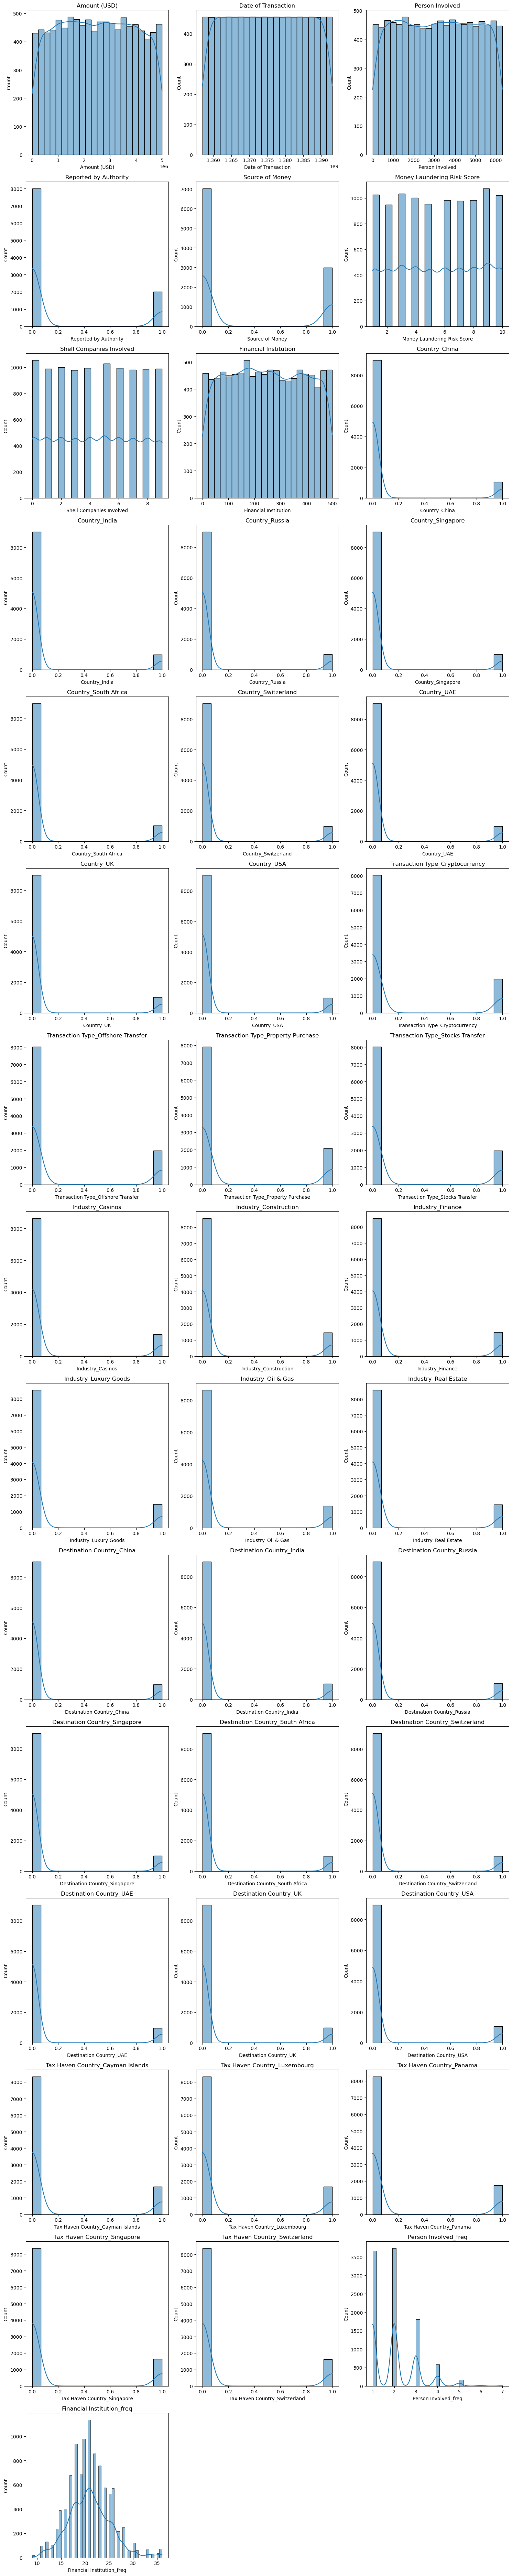

'\nafter checking, Im not sure which one to use so I just use standization for SVM and KNN and LR\n'

In [25]:
''' 
check weather to use standization, normalization or neither
standization: becasue we have to use KNN and SVM, which are sensitive to the scale of the data
normalization: when the data is not normally distributed,
We will have 2 kind of feature selection, on eis for tree-based, since it wouldn't have any issue with the scale of the data(using df-Encode), 
and the other one is for the model that are sensitive to the scale of the data(LR, KNN, SVM)
For the other one We will do standization, normalization before the feature selection part(Using df_E_S_N). Becasue we have will use warpper and Emvedded method, 
which might use the model that are sensitive to the scale of the data(LR, KNN, SVM)
'''

# checking cloumns Gaussian (normal) distribution
import seaborn as sns
import matplotlib.pyplot as plt
num_columns = len(df_Encode.columns)
num_rows = (num_columns + 2) // 3  # Adjust the number of rows based on the number of columns

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))  # Create a grid of subplots

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(df_Encode.columns):
    sns.histplot(df_Encode[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

'''
after checking, Im not sure which one to use so I just use standization for SVM and KNN and LR
'''

In [26]:
''' 
again I am not sure, therefore I just have both of them, and saved into difference dataframes,
will use the one have the best performance in baseline model
'''
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#Normalization
df_E_N = df_Encode.copy()
scaler_N = MinMaxScaler()
df_E_N[numcols] = scaler_N.fit_transform(df_E_N[numcols])

#Standization
df_E_S = df_Encode.copy()
scaler_sd = StandardScaler()
df_E_S[numcols] = scaler_sd.fit_transform(df_E_S[numcols])

#Standization and Normalization
df_E_SN = df_Encode.copy()
df_E_SN['Financial Institution_freq'] = scaler_sd.fit_transform(df_E_SN[['Financial Institution_freq']])#Financial Institution_freq follow the normal distribution
numcols.remove('Financial Institution_freq')
df_E_SN[numcols] = scaler_N.fit_transform(df_E_SN[numcols])

                                                    


Testing which dataset has the best preformance


In [27]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_list = [ #df_Encode, 
           df_E_N, 
           df_E_S, 
           df_E_SN]
cr_list = []
cm_list = []
#search for the best df for standization and normalization
for i in range(0,len(df_list)):
    df = df_list[i]
    X = df.drop('Source of Money', axis=1)
    y = df_Encode['Source of Money'] # might because of the same user have multiple transactions, which is illegal, or ligal but we need to check the data, even in the test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rus = RandomUnderSampler(random_state=42) #since the dataset is imbalanced, we use RandomUnderSampler to balance the dataset, as we got lots of data, from 5628 to 2372
    X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
    #print('Original dataset shape:', Counter(y_train))
    #print('Resampled dataset shape:', Counter(y_resampled))
    #Logistic Regression baseline model
    lr_classifier = LogisticRegression(random_state=42)
    lr_classifier.fit(X_resampled, y_resampled)
    y_pred_lr_b = lr_classifier.predict(X_test)
    lr_cr = classification_report(y_test, y_pred_lr_b)
    lr_cm = confusion_matrix(y_test, y_pred_lr_b)
    #print(f'\n{lr_cr}\n')
    #print(f'\n{lr_cm}\n')
    cr_list.append(lr_cr)
    cm_list.append(lr_cm)







    


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [28]:
# Logsit regression Results

for i in range(0, len(cr_list)):
    print("Classification Reports:")
    print(cr_list[i])
    print('Confusion Matrix:')
    print(cm_list[i])
''' 
based on the result, we can see that the df_E_SN has the best performance, so we are gonna use it to train the model like SVM, LR etc.
'''


Classification Reports:
              precision    recall  f1-score   support

           0       0.70      0.49      0.57      1389
           1       0.31      0.53      0.39       611

    accuracy                           0.50      2000
   macro avg       0.51      0.51      0.48      2000
weighted avg       0.58      0.50      0.52      2000

Confusion Matrix:
[[677 712]
 [289 322]]
Classification Reports:
              precision    recall  f1-score   support

           0       0.70      0.49      0.58      1389
           1       0.31      0.52      0.39       611

    accuracy                           0.50      2000
   macro avg       0.51      0.51      0.48      2000
weighted avg       0.58      0.50      0.52      2000

Confusion Matrix:
[[684 705]
 [293 318]]
Classification Reports:
              precision    recall  f1-score   support

           0       0.71      0.50      0.58      1389
           1       0.32      0.53      0.40       611

    accuracy                

' \nbased on the result, we can see that the df_E_SN has the best performance, so we are gonna use it to train the model like SVM, LR etc.\n'

In the end we found that the df_E_N has the best performance in the baseline model, therefore we will use it for the next step

### 5. Classification model

Use GridSearchCV to tune the parameter on the df_Encode dataset with tree-based algo, with all the features (feature selection is in the next step, no need to preform here)
Use GridSearchCV to tune the parameter on the df_E_SN dataset with SVM LR etc, with all the features (feature selection is in the next step, no need to preform here)

Logistic Regression

Decision Tree

Random Forest

SGD

SVM

### 6.) Feature extraction


As we have already preformanced it in step 4, we can take the result and further investgate the feature martix, might did some manual selection and see if the result improved

In [29]:
''' 
we have 3 df, df_Encode, df_E_N, df_E_S
df_Encode: for tree-based model
df_E_N: used normalization
df_E_S: used standization
we will use the df_E_N or df_E_S for SVM, LR, etc. which has the best performance in baseline
'''
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

#Feature Selection

def cor_selector(X, y,num_feats):
    # Your code goes here (Multiple lines)
    cor_list = []
    feature_name = X.columns.tolist()
    for i in feature_name:
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    #print(np.argsort(np.abs(cor_list)))
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    #print(cor_feature)
    cor_support = [True if i in cor_feature else False for i in feature_name]
    # Your code ends here
    return cor_support, cor_feature

def chi_squared_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    X_norm = MinMaxScaler().fit_transform(X)
    chi_selector = SelectKBest(chi2, k=num_feats)
    chi_selector.fit(X_norm, y)
    chi_support = chi_selector.get_support()
    #print(chi_support)
    chi_feature = X.loc[:,chi_support].columns.tolist()
    # Your code ends here
    return chi_support, chi_feature

def rfe_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    rfe_selector = RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=num_feats, step=10, verbose=5)
    rfe_selector.fit(X, y)
    rfe_support = rfe_selector.support_
    rfe_feature = X.loc[:,rfe_support].columns.tolist()
    # Your code ends here
    return rfe_support, rfe_feature

def embedded_log_reg_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    embedded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2", random_state = 42), max_features=num_feats)
    embedded_lr_selector.fit(X, y)
    embedded_lr_support = embedded_lr_selector.get_support()
    embedded_lr_feature = X.loc[:,embedded_lr_support].columns.tolist()
    # Your code ends here
    return embedded_lr_support, embedded_lr_feature

def embedded_rf_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), max_features=num_feats)
    embeded_rf_selector.fit(X, y)
    embedded_rf_support = embeded_rf_selector.get_support()
    embedded_rf_feature = X.loc[:,embedded_rf_support].columns.tolist()
    # Your code ends here
    return embedded_rf_support, embedded_rf_feature

def embedded_lgbm_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    lgbc = LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2, reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)
    embeded_lgbm_selector = SelectFromModel(lgbc, max_features=num_feats)
    embeded_lgbm_selector.fit(X, y)
    embedded_lgbm_support = embeded_lgbm_selector.get_support()
    embedded_lgbm_feature = X.loc[:,embedded_lgbm_support].columns.tolist()
    # Your code ends here
    return embedded_lgbm_support, embedded_lgbm_feature

def autoFeatureSelector(X, y, num_feats, methods=[]): 

    #print("start training...")
    # Run every method we outlined above from the methods list and collect returned best features from every method
    if 'pearson' in methods:
        #print("pearson")
        cor_support, cor_feature = cor_selector(X, y,num_feats)
    if 'chi-square' in methods:
        #print("chi-square")
        chi_support, chi_feature = chi_squared_selector(X, y,num_feats)
    if 'rfe' in methods:
        #print("rfe")
        rfe_support, rfe_feature = rfe_selector(X, y,num_feats)
    if 'log-reg' in methods:
        #print("log-reg")
        embedded_lr_support, embedded_lr_feature = embedded_log_reg_selector(X, y, num_feats)
    if 'rf' in methods:
        #print("rf")
        embedded_rf_support, embedded_rf_feature = embedded_rf_selector(X, y, num_feats)
    if 'lgbm' in methods:
        #print("lgbm")
        embedded_lgbm_support, embedded_lgbm_feature = embedded_lgbm_selector(X, y, num_feats)
    
    
    # Combine all the above feature list and count the maximum set of features that got selected by all methods
    #### Your Code starts here (Multiple lines)
    feature_name = list(X.columns)
    print("Combining all methods")
    feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embedded_lr_support,
                                    'Random Forest':embedded_rf_support, 'LightGBM':embedded_lgbm_support})
    feature_selection_df['Total'] = feature_selection_df.apply(lambda row: np.sum(row[1:].astype(int)), axis=1)
    print("Sorting features")
    feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
    feature_selection_df.index = range(1, len(feature_selection_df)+1)
    print("Selecting best features")
    best_features = feature_selection_df['Feature'].tolist()[:num_feats]
    #### Your Code ends here
    return best_features, feature_selection_df

In [30]:
features_list = []
df_name, df_ = ('df_Encode or df_E_N','df_Encode or df_E_N')
X = df_.drop('Source of Money', axis=1)
X = X.drop('Person Involved', axis=1) #drop the column, it is a existing 'blacklist' model cannot learn what makes them blacklisted, it is a cheating, therefore we drop it
y = df_['Source of Money']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_feats = 20
methods = ['pearson', 'chi-square', 'rfe', 'log-reg', 'rf', 'lgbm']
best_features, feature_selection_df = autoFeatureSelector(X_train, y_train, num_feats, methods)
feature_selection_df.to_csv(f'{df_name}_feature_matrix.csv', index=False)
print(best_features)
features_list.append(best_features)

AttributeError: 'str' object has no attribute 'drop'

Logistic Regression

### Exploratory Data Analysis(just for reference)

don't mind here, it is just for record

In [15]:
# decision tree baseline model & result
#from sklearn.tree import DecisionTreeClassifier
#X = df_Encode.drop('Source of Money', axis=1)
#y = df_Encode['Source of Money']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#rus = RandomUnderSampler(random_state=42) #since the dataset is imbalanced, we use RandomUnderSampler to balance the dataset, as we got lots of data, from 5628 to 2372
#X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
#print('Original dataset shape:', Counter(y_train))
#print('Resampled dataset shape:', Counter(y_resampled))
#decision tree baseline model
#dt_classifier = DecisionTreeClassifier(random_state=42)
#dt_classifier.fit(X_resampled, y_resampled)
#y_pred_dt_b = dt_classifier.predict(X_test)
#dt_cr = classification_report(y_test, y_pred_dt_b)
#dt_cm = confusion_matrix(y_test, y_pred_dt_b)
#print(f'\n{dt_cr}\n')
#print(f'\n{dt_cm}\n')



              precision    recall  f1-score   support

           0       0.69      0.50      0.58      1389
           1       0.31      0.51      0.38       611

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.48      2000
weighted avg       0.58      0.50      0.52      2000



[[688 701]
 [302 309]]



In [16]:
#save as csv
#df_Encode.to_csv('df_Encode.csv', index=False)
#df_E_SN.to_csv('df_E_SN.csv', index=False)

In [13]:
#print(f'\n{features_list[0]}\n')
#print(f'\n{features_list[1]}\n')
#print(f'\n{features_list[2]}\n')
#print(f'\n{features_list[3]}\n')




['Amount (USD)', 'Shell Companies Involved', 'Financial Institution', 'Date of Transaction', 'Transaction Type_Property Purchase', 'Tax Haven Country_Switzerland', 'Person Involved_freq', 'Money Laundering Risk Score', 'Industry_Real Estate', 'Industry_Finance', 'Industry_Construction', 'Industry_Casinos', 'Financial Institution_freq', 'Destination Country_USA', 'Destination Country_UK', 'Destination Country_India', 'Destination Country_China', 'Country_USA', 'Country_Singapore', 'Country_China']


['Transaction Type_Property Purchase', 'Tax Haven Country_Singapore', 'Tax Haven Country_Luxembourg', 'Destination Country_USA', 'Destination Country_South Africa', 'Destination Country_India', 'Country_USA', 'Country_Singapore', 'Country_China', 'Shell Companies Involved', 'Industry_Casinos', 'Financial Institution', 'Country_South Africa', 'Amount (USD)', 'Tax Haven Country_Switzerland', 'Tax Haven Country_Panama', 'Tax Haven Country_Cayman Islands', 'Person Involved_freq', 'Money Launder

In [18]:
'''
based on the result we will using df_E_SN for SVM, LR, etc.
and df_Encod for tree-based model
And the features would be here:
'''
#df_Encod_features = features_list[0]
#df_E_S_features = features_list[1]

In [21]:
#save as csv
#df_Encode[df_Encod_features].to_csv('df_Encode_features.csv', index=False)
#df_E_SN[df_E_S_features].to_csv('df_E_N_features.csv', index=False)

In [20]:
#Visualizing the dataset based on the target variable

#target = df['Source of Money']

#sns.pairplot(df, hue='Source of Money')
#plt.show()
#sns.countplot(target)
#plt.show()
